In [1]:
using LinearAlgebra
using Distributions
#using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [2]:
using DataFrames


In [3]:
#using StatsPlots


In [4]:
using Base.Threads
println("Threads: ", nthreads())


Threads: 4


In [5]:
using Revise
using Newtrinos
using Newtrinos.osc

In [6]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
⌃ [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
⌃ [3cd96dde] UnROOT v0.8.20
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [52]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NND(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}(NND(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#46"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NND, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [53]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

In [54]:
experiments = (
 
    kamland = Newtrinos.kamland.configure(physics),
);

[ Info: Loading kamland data


In [55]:
p = Newtrinos.get_params(experiments)

(N = 20.0, kamland_energy_scale = 0.0, kamland_flux_scale = 0.0, kamland_geonu_scale = 0.0, m₀ = 0.01, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [56]:
#img = experiments.kamland.plot(p)
#display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/natural plot/kamland/kamland_NNM_20.png", img)

In [57]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = ( Δm²₂₁=31, r =31)  

modified_priors = (
    N =p.N, 
    m₀= p.m₀,
    r = all_priors.r,
    
   
  

    Δm²₂₁ =all_priors.Δm²₂₁,  
    Δm²₃₁ = p.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ =p.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)


(N = 20.0, m₀ = 0.01, r = Uniform{Float64}(a=1.0e-8, b=1.0), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [58]:

likelihood = Newtrinos.generate_likelihood(experiments);


In [59]:

result = Newtrinos.profile(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:12:34Progress:   0%|▏                                        |  ETA: 1:52:52


NewtrinosResult((Δm²₂₁ = [6.5e-5, 6.583333333333333e-5, 6.666666666666666e-5, 6.75e-5, 6.833333333333333e-5, 6.916666666666666e-5, 7.0e-5, 7.083333333333332e-5, 7.166666666666667e-5, 7.25e-5  …  8.25e-5, 8.333333333333333e-5, 8.416666666666668e-5, 8.5e-5, 8.583333333333334e-5, 8.666666666666667e-5, 8.750000000000001e-5, 8.833333333333334e-5, 8.916666666666667e-5, 9.0e-5], r = [1.0e-8, 0.033333343, 0.066666676, 0.100000009, 0.133333342, 0.166666675, 0.200000008, 0.233333341, 0.266666674, 0.30000000699999996  …  0.700000003, 0.733333336, 0.766666669, 0.8000000020000001, 0.8333333350000001, 0.866666668, 0.900000001, 0.9333333340000001, 0.966666667, 1.0]), (N = [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0], kamland_energy_scale = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], kamland_flux_scale = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], kamland_geonu_scale = [0.0 0

In [60]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [61]:
JLD2.@save "scan_kamland_Δm²₂₁r_NND.jld2" result

In [62]:
using CairoMakie

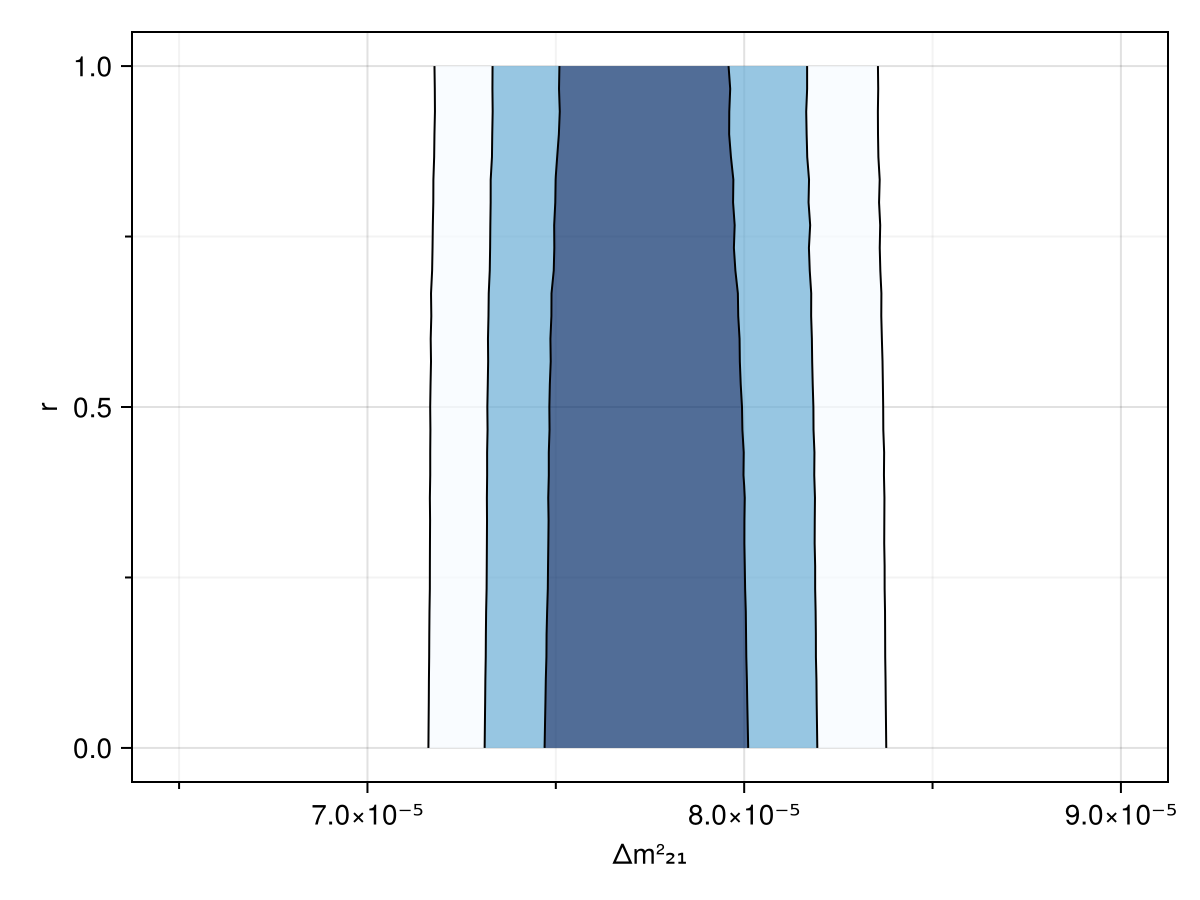

In [63]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/kamland_Δm²₂₁r_NND.png", img)


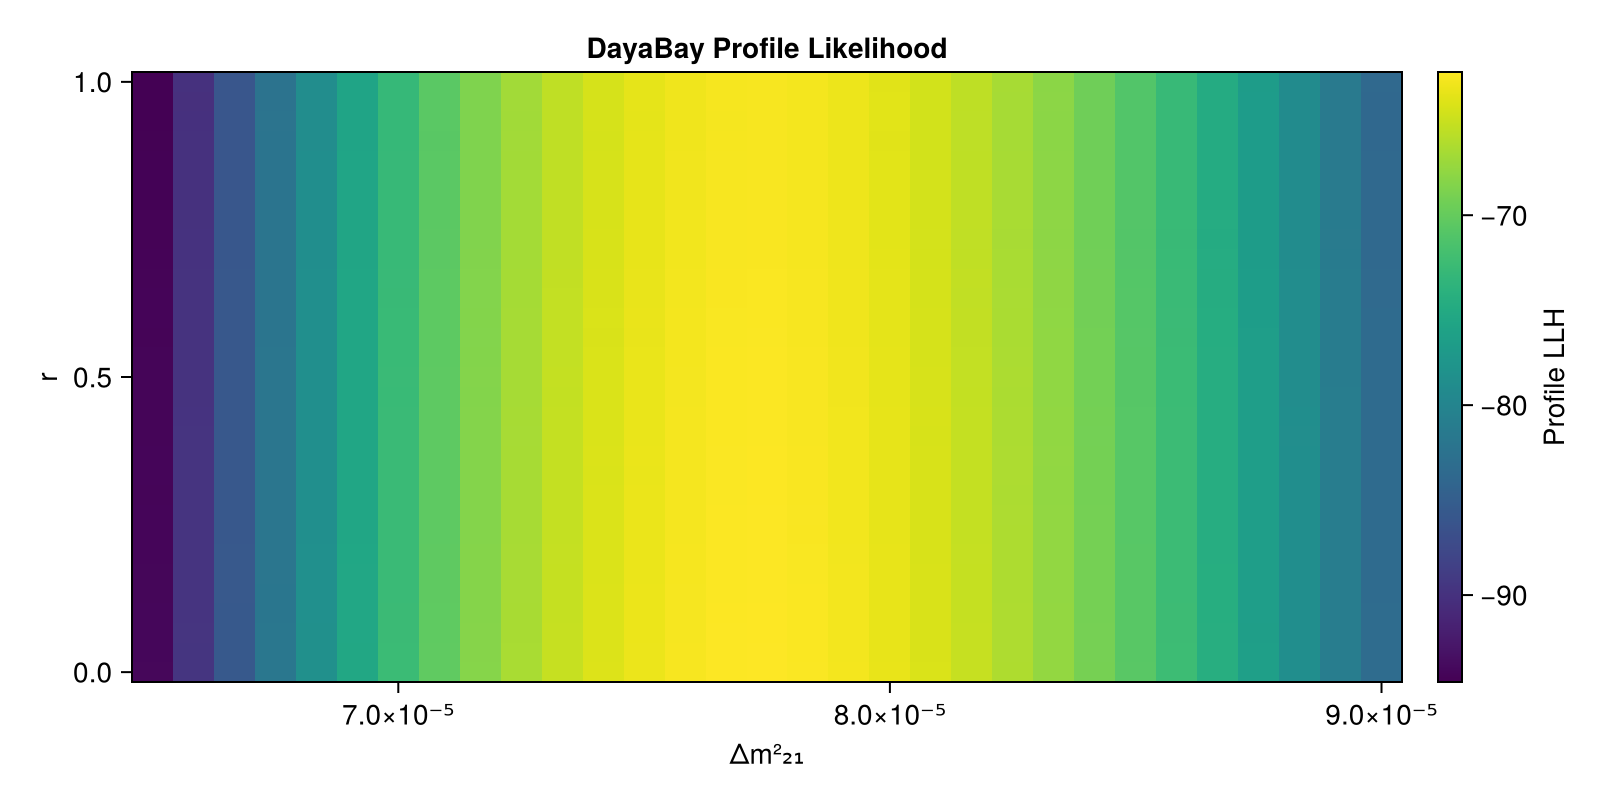

In [64]:
llh_data = Float64.(result.values.llh)


fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)
Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_rN_NND_profthetadeltam_.png", fig)
fig

Likelihood ratio test


In [65]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

ll_0: Any[-302.4716069851248 -299.3814874105783 -296.4203722706933 -293.59234495586077 -290.9012228039638 -288.35056712385074 -285.94369439814386 -283.68368793802586 -281.57340928265756 -279.61550867771734 -277.81243402826044 -276.16643779754367 -274.67958141218804 -273.35373683184406 -272.1905850449926 -271.19161135872866 -270.35809745648305 -269.69111030125646 -269.19148806087566 -268.8598233242585 -268.6964439622668 -268.70139206213855 -268.8744014299001 -269.21487420974427 -269.7218572126701 -270.39401857825914 -271.22962541301723 -272.22652305612775 -273.38211661851614 -274.6933554238578 -276.1567209506018; -292.6154096192527 -289.4012557669376 -286.3225331994417 -283.38344656945026 -280.58792640021977 -277.93964176186483 -275.4420141000042 -273.09823138122744 -270.9112617484946 -268.88386593278574 -267.0186077414477 -265.3178620348856 -263.78381970757397 -262.4184893028572 -261.22369500996587 -260.2010709126542 -259.35205147876366 -258.67785839617017 -258.1794839707194 -257.85767

1.0

Oscillations


In [66]:

# STANDARD MODEL
E_range = range(0.002, 0.008, length=1000) 
L=180
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers);


experiments_SM = (
 
    kamland = Newtrinos.kamland.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

[ Info: Loading kamland data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.5328444160207639
 0.46842294337211426
 0.44601848057264504
 0.467756510678217
 0.4420892446467301
 0.38401133675364607
 0.3765592159615382
 0.3933814518888332
 0.36071378400532866
 0.31176837265362123
 0.31188461926432903
 0.3247326053269489
 0.2921732382409402
 ⋮
 0.3934653699129192
 0.3894751475128693
 0.3855897175404817
 0.38183879300059226
 0.37825027491226954
 0.3748499564154767
 0.3716612558256643
 0.3687049811470129
 0.3659991281390004
 0.36355871360118874
 0.3613956451028241
 0.3595186279424389

[:, :, 2, 1] =
 0.19919667650791767
 0.37741478651874527
 0.3768714796109813
 0.21425417781045314
 0.2590383264579828
 0.4365481836656524
 0.3873309776457235
 0.22804256601417372
 0.305559075007893
 0.47654899019332786
 0.40491050123224387
 0.24644816100767905
 0.3305635797075912
 ⋮
 0.3601554079890415
 0.373165733277428
 0.38571566636984606
 0.3976712685441839
 0.4089060425145391
 0.41930228184703855
 0.4287523058304188
 0.437159567695219

In [67]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=true)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=true)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=true)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=true)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=true)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=true)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=true)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=true)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.5292937432429183
 0.4658996644978798
 0.4411070999357181
 0.4655508919705132
 0.4369475171601459
 0.38003890107680455
 0.37126523331830513
 0.3876432899950921
 0.3583850318671912
 0.30699977271916085
 0.3096553753229067
 0.3208226208061972
 0.2910632126419063
 ⋮
 0.3936719290342652
 0.385414904884109
 0.3837971930828706
 0.37786681947562534
 0.3775391480092236
 0.37106191896009716
 0.36927294427784324
 0.3667033805812062
 0.3632493017322427
 0.36073821510125326
 0.3602773857094792
 0.3552459853117551

[:, :, 2, 1] =
 0.19735821353678884
 0.37210857248091056
 0.3726633420357013
 0.21140814121393103
 0.25581016992284583
 0.4328559116379307
 0.3809589780678361
 0.22521373073518766
 0.300921973187549
 0.46910082396686564
 0.400946256309223
 0.24225298045257154
 0.32771387495793197
 ⋮
 0.3571301647554806
 0.3684555106268976
 0.38120770361936496
 0.39476640292096804
 0.40363691809009844
 0.41545469177545497
 0.42480423363370023
 0.43276114782

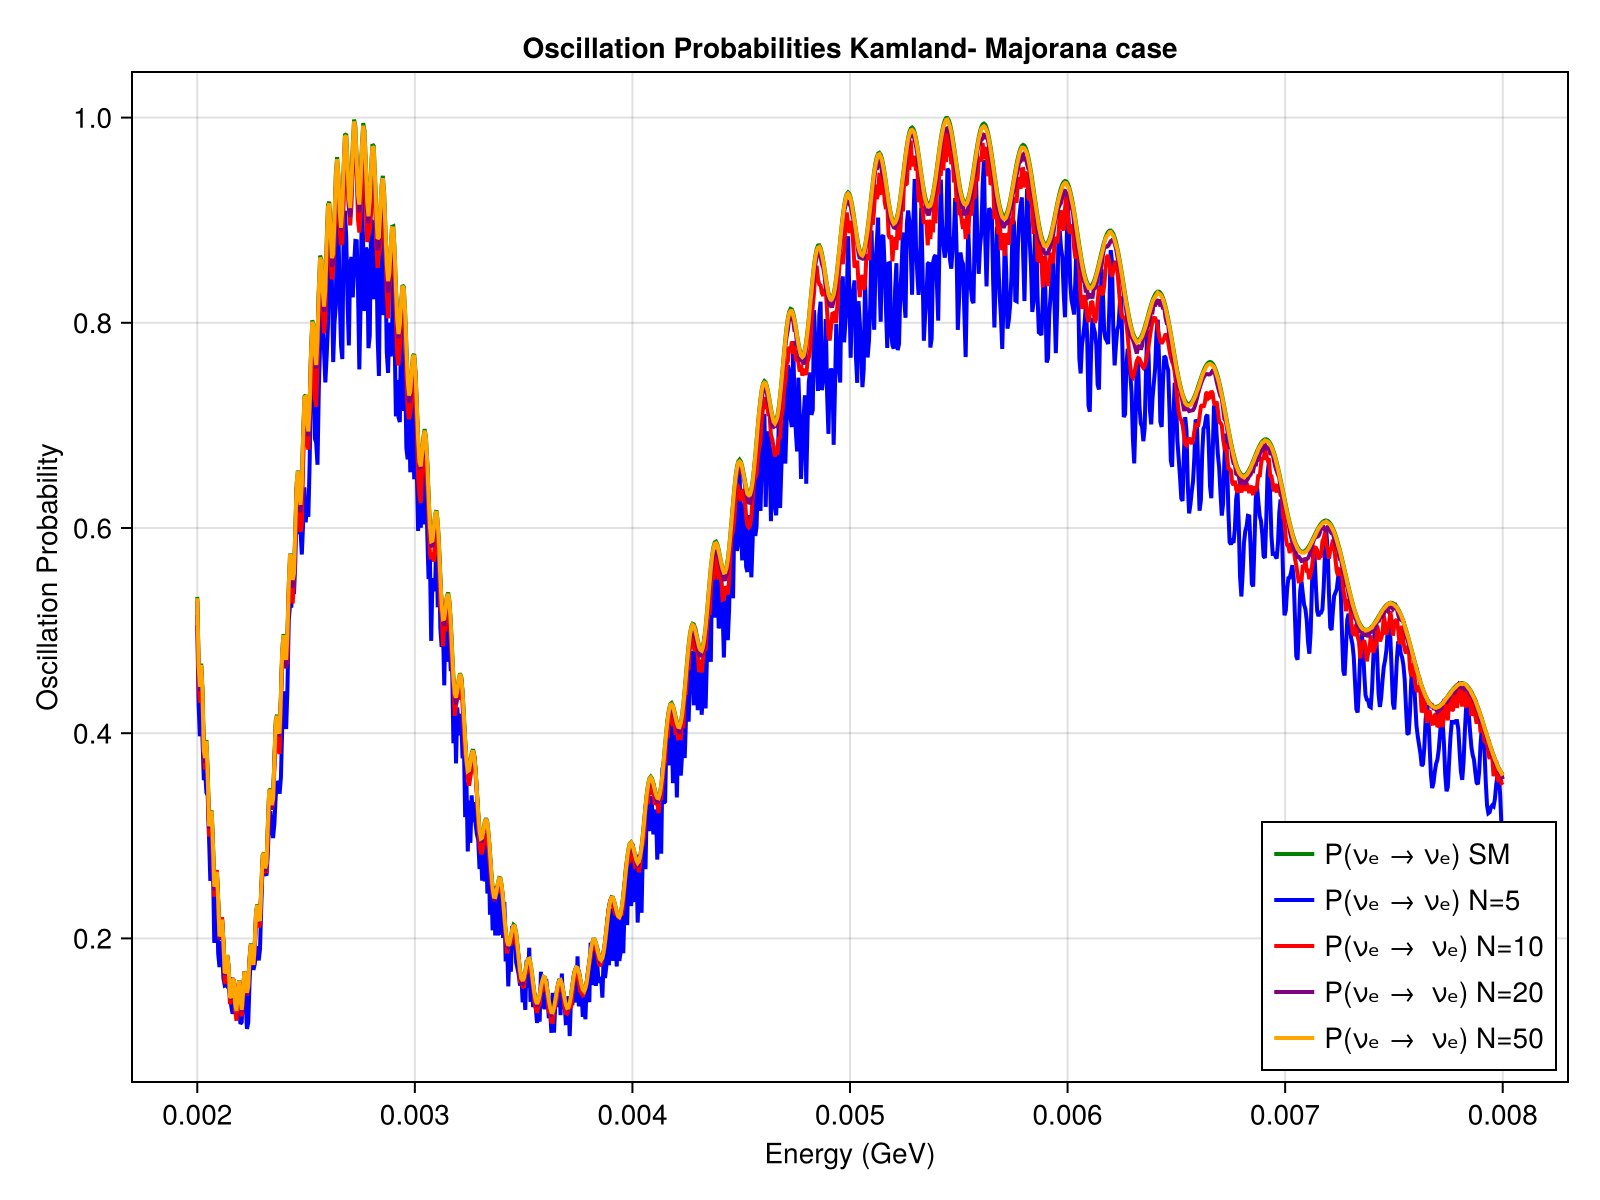

In [68]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Kamland- Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 1, 1], label="P(νₑ → νₑ) N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 1, 1], label="P(νₑ →  νₑ) N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1, 1, 1], label="P(νₑ →  νₑ) N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1, 1, 1], label="P(νₑ →  νₑ) N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/osc_kamland_N_majorana.png", fig)

fig

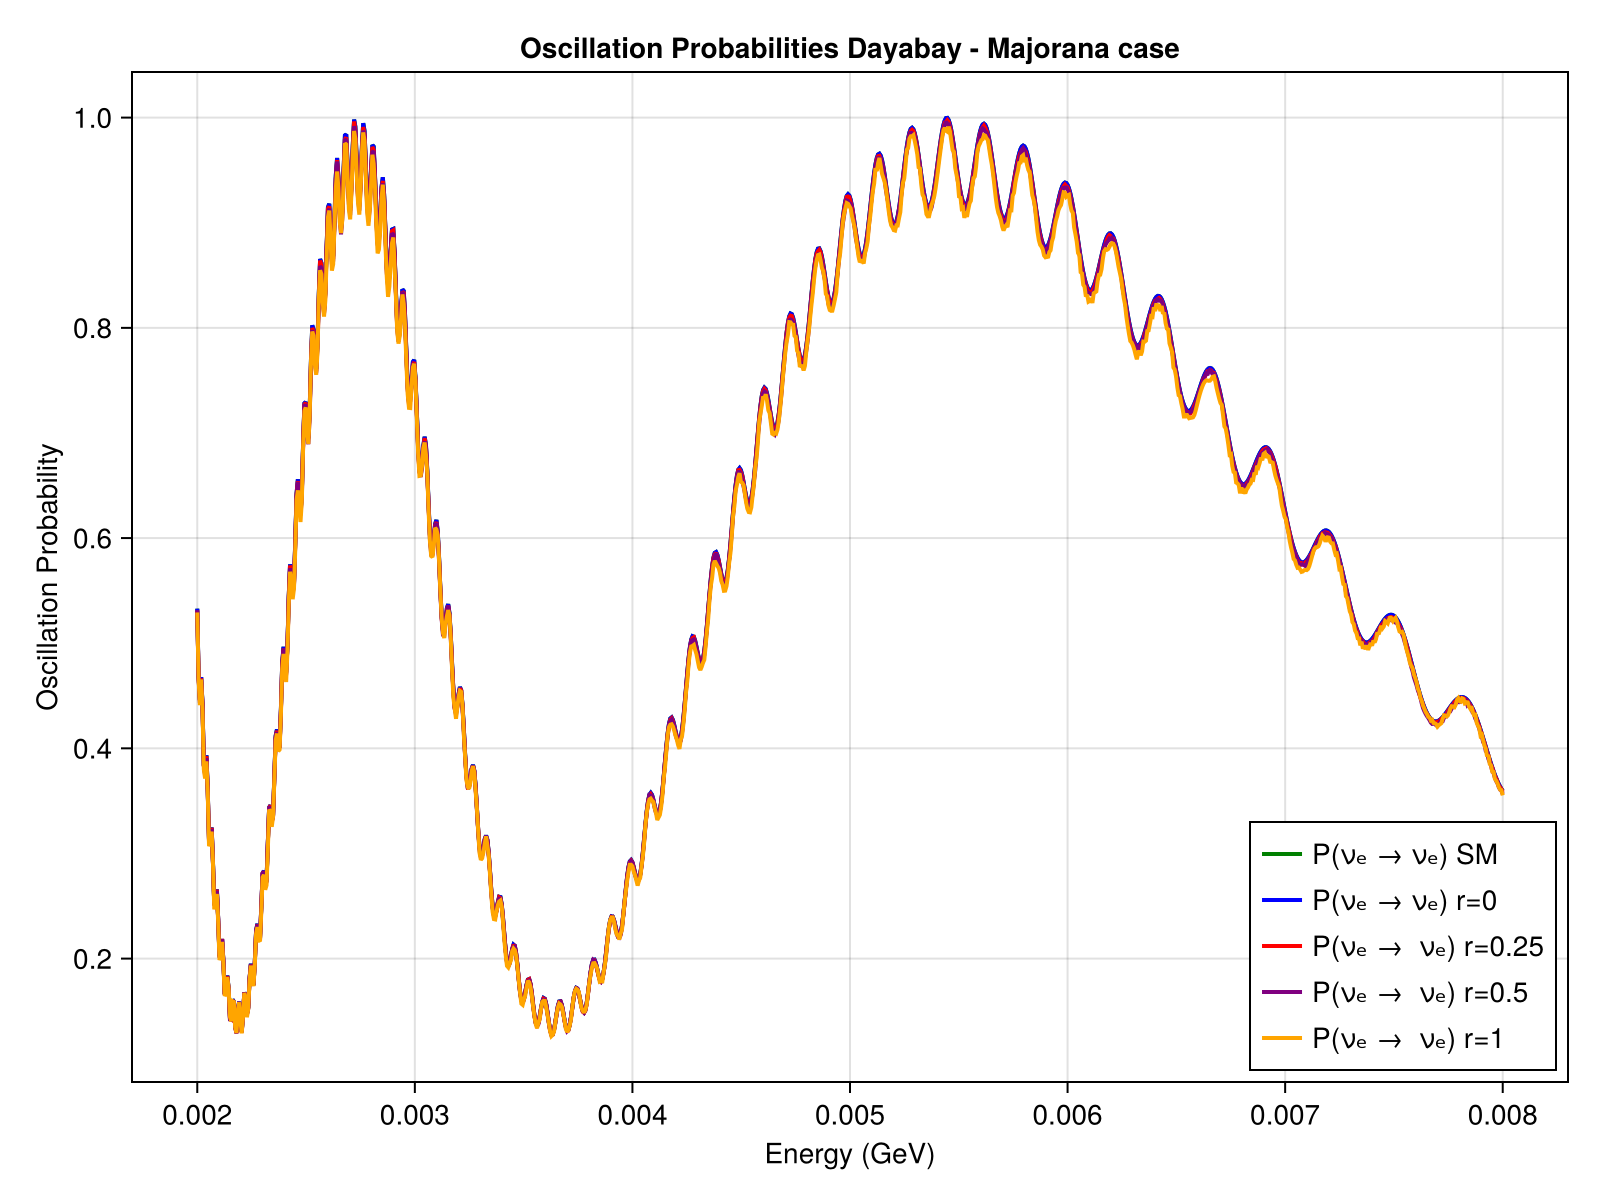

In [69]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Dayabay - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1, 1, 1], label="P(νₑ → νₑ) r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 1, 1], label="P(νₑ →  νₑ) r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/osc_kamland_r_dirac.png", fig)

fig